# Q1

## a)


In [220]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import os
print(os.path.abspath("FML_HW2_Q1.ipynb"))


C:\Users\Albaloo\FML_HW2_Q1.ipynb


In [212]:
data = pd.read_csv(r"E:\UNIVERSITY\Machine-Learning\HomeWork\HW2\Practical\data\car_data.csv")
data.head(10)

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
5,846,Female,47,33500,1
6,219,Female,46,132500,1
7,588,Male,42,64000,0
8,85,Female,30,84500,0
9,465,Male,41,52000,0


## b)

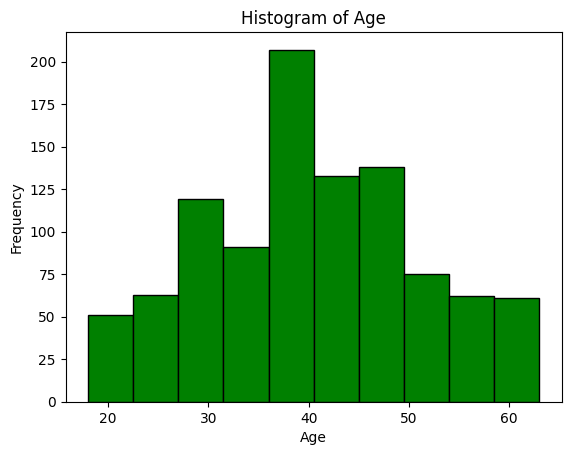

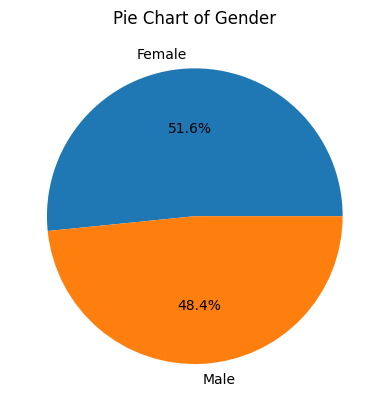

In [213]:
#for age histogram
plt.hist(data['Age'], bins=10, color='green', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

#for gender pie chart
gender_counts = data['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Pie Chart of Gender')
plt.show()


## c)

In [214]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
del data['User ID']

data.head(10)

,Gender,Age,AnnualSalary,Purchased
0,1,35,20000,0
1,1,40,43500,0
2,1,49,74000,0
3,1,40,107500,1
4,1,25,79000,0
5,0,47,33500,1
6,0,46,132500,1
7,1,42,64000,0
8,0,30,84500,0
9,1,41,52000,0


## d)


In [215]:
sc = StandardScaler()
X = data[['Gender', 'Age', 'AnnualSalary']]
y = data['Purchased']
X = sc.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## e)


In [216]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))


def cross_entropy(y_true, y_pred):
  return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))


def accuracy(y_true, y_pred):
  return np.mean(y_true == y_pred)


def logistic_regression(X, y, alpha=0.01, epochs=1500):
  m, n = X.shape

  X = np.c_[np.ones(m), X]

  W = np.random.randn(n + 1)

  losses = []
  accuracies = []

  for i in range(epochs):
    y_pred = sigmoid(X.dot(W))

    loss = cross_entropy(y, y_pred)

    acc = accuracy(y, (y_pred >= 0.5).astype(int))

    losses.append(loss)
    accuracies.append(acc)

    grad = X.T.dot(y_pred - y) / m

    W = W - alpha * grad


  return W, losses, accuracies



## f)

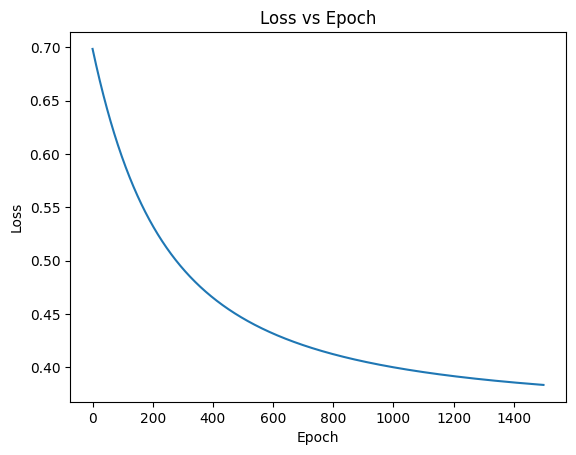

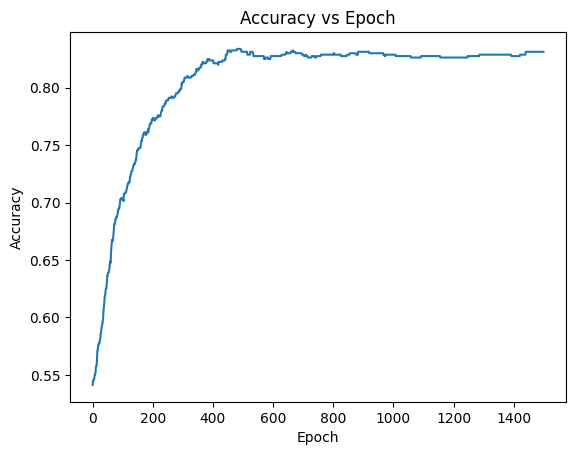

In [217]:
W, losses, accuracies = logistic_regression(X_train, y_train)

plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.show()

## g)

In [218]:
m, n = X_test.shape
X_test = np.c_[np.ones(m), X_test]
y_pred = sigmoid(X_test.dot(W))
test_loss = cross_entropy(y_test, y_pred)
test_acc = accuracy(y_test, (y_pred >= 0.5).astype(int))

print(f'Test data Loss: {test_loss:.4f}, Test data Accuracy: {test_acc:.4f}')

Test data Loss: 0.4116, Test data Accuracy: 0.8200
